# Deep Neural Network for Handwritten Digit Recognition using MNIST Dataset: Achieving 98.43% Accuracy

### STEP1: IMPORTING LIBRARIES 

The first step involves loading the necessary libraries for handling data, visualising it, building a neural network model, and preprocessing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### STEP2: LOADING AND PRE-PROCESSING THE DATA:

The MNIST dataset, which consists of handwritten digit pictures and their related labels, is loaded in this stage. In order to aid the neural network's convergence, we then normalise the pixel values to fall between the range of 0 and 1. In order to convert the labels into a categorical format, we also one-hot encode them.


In [2]:
#Loading and preprocessing the dataset:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


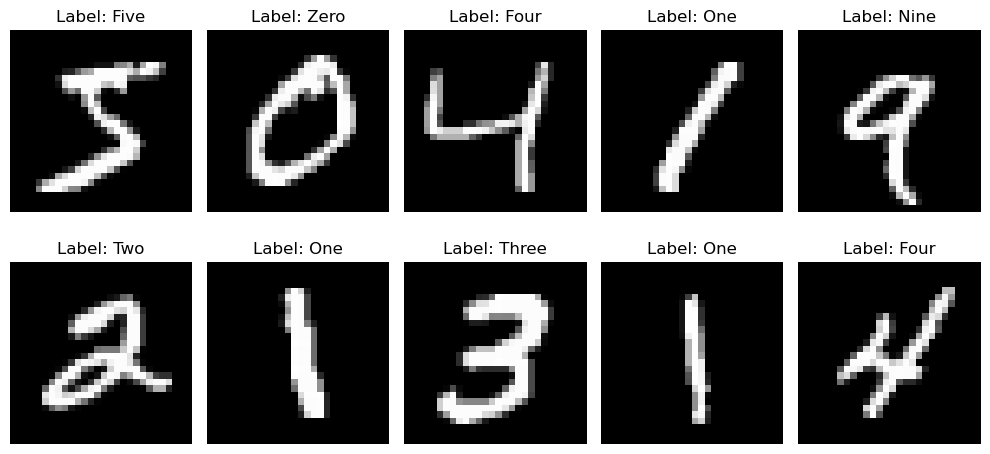

In [3]:
# Define label names
label_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

# Display a few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {label_names[y_train[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [5]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### STEP3: BUILDING THE DEEP NEURAL NETWORK:

#### Here's a layer-by-layer explanation of the model architecture:

The **Flatten** layer: This layer converts the **2D image data** (28x28 pixels) into a **1D array**, which is required as input for the subsequent fully connected layers.

The first **Dense** layer with 512 units: This is a **fully connected layer** with **512 neurons**. It uses the **ReLU (Rectified Linear Activation)** function, which introduces non-linearity into the model.

The **second Dense layer with 256 units**: Another fully connected layer with 256 neurons and ReLU activation.

The **final Dense layer with 10 units**: This layer has **10 neurons**, each representing a digit from 0 to 9. It uses the softmax activation function, which converts the output into probability scores, indicating the likelihood of each digit class

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### STEP4: BUILDING THE MODEL:

In this step, we train the model using the training data. The fit function iterates over the data for a certain number of epochs (iterations), and during each epoch, it updates the model's parameters to minimize the specified loss function. (TRAINED BY 30 EPOCHS YOU CAN INCREASE THE EPOCHS, IF YOU WANT)

In [7]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/30
375/375 [==============================] - 6s 12ms/step - loss: 0.2553 - accuracy: 0.9262 - val_loss: 0.1439 - val_accuracy: 0.9563
Epoch 2/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0928 - accuracy: 0.9714 - val_loss: 0.0958 - val_accuracy: 0.9698
Epoch 3/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0891 - val_accuracy: 0.9728
Epoch 4/30
375/375 [==============================] - 4s 12ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0953 - val_accuracy: 0.9726
Epoch 5/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0904 - val_accuracy: 0.9760
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0912 - val_accuracy: 0.9753
Epoch 7/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0935 - val_accuracy: 0.9754

### STEP5: VISUALIZE THE TRAINING PROGRESS:

We had plot the training and validation loss as well as the training and validation accuracy over the epochs. This helps us visualize how well the model is learning and whether there's any overfitting.

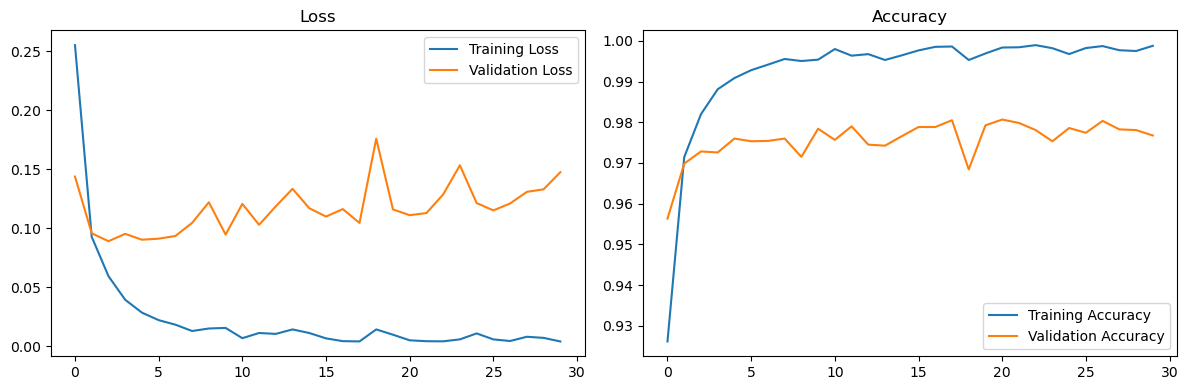

In [8]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


### STEP6: EVALUATION: (ON TEST SET)

Finally, we evaluate the model's performance on the test dataset using the evaluate function. This provides us with the test loss and test accuracy, which give insights into how well the model generalizes to unseen data.

This step-by-step explanation should give you a better understanding of the components and process involved in building and training a deep neural network for digit recognition using the MNIST dataset.

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9775
Test loss: 0.1314
Test accuracy: 0.9775


### MAKING SURE THAT IT CAN ACTUALLY PREDICT THE RIGHT THINGS:

313/313 [==============================] - 1s 3ms/step


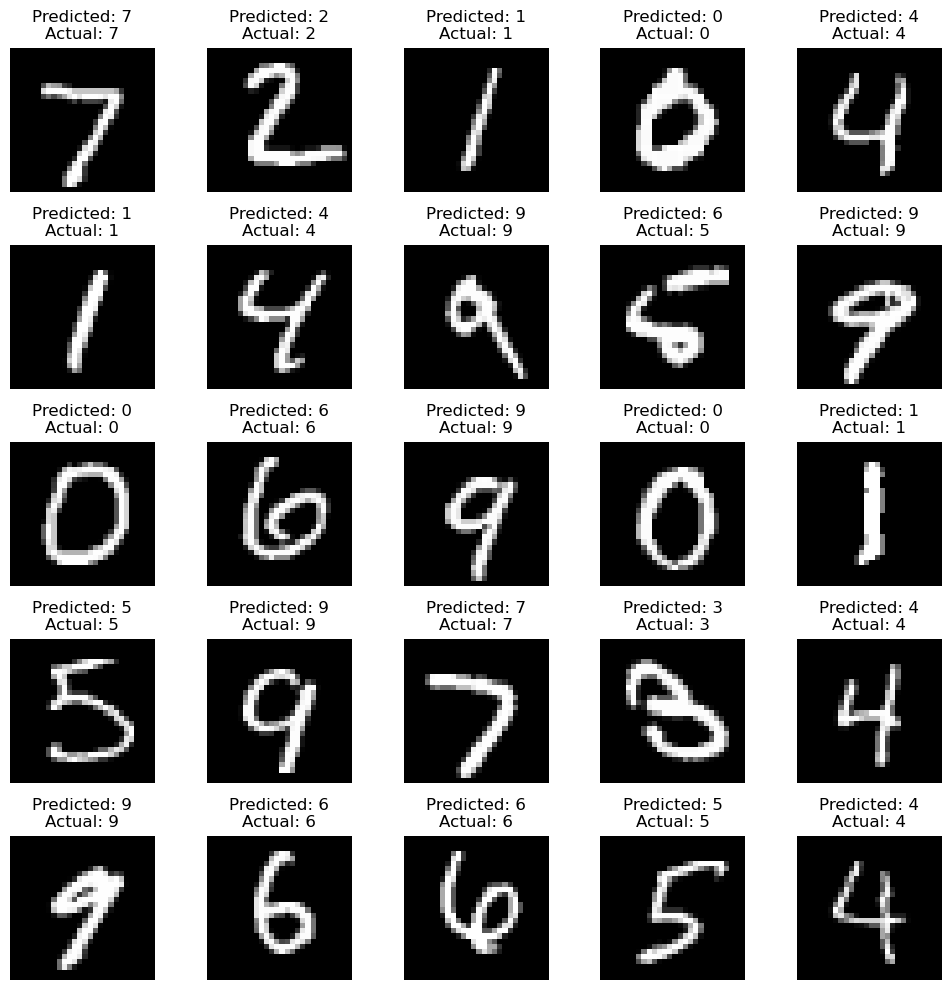

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Find the index with the highest probability for each prediction
predicted_labels = np.argmax(predictions, axis=1)

# Display a few test images along with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {np.argmax(y_test[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# EXTENDED EXPLANATION: (BECAUSE WHY NOT!)

### LET'S FIRST GO BACK TO STEP-3 WHERE WE WERE BUILDING THE NEURAL NETWORK:

#### SO NOW, THE QUESTIONS TO BE ADDRESSED ARE:
##### 1. WHY WE USED SOFTMAX?, 
##### 1. WHY OPTIMIZER = 'ADAM'?, 
##### 1. WHATS THERE CONNECTION WITH EACH OTHER? 

### Activation Function: Softmax:

1. The **softmax activation function** is used in the model's last layer. The softmax function converts the 256 units from the preceding layer's raw output scores into a probability distribution across the classes (numbers between 0 and 9).

1. The output values are interpretable as probabilities since Softmax makes sure they are positive and add up to 1. Each output value shows the likelihood that the input picture belongs to a specific class (of digits).


### Optimizer: Adam

1. The **Adagrad** and **RMSProp optimizer**s are used in the optimisation process known as Adam (short for Adaptive Moment Estimation). It works well for deep neural network training.

1. **Adam customises the learning rates for each parameter separately**, making it flexible and appropriate for various data kinds and architectural configurations.

1. The compilation stage establishes how the model will be trained to learn. The weights of the model are changed by the optimizer (Adam in this example) to minimise the loss function during backpropagation.


### Connection and Roles:

1. Activation functions introduce **non-linearity, capturing complex relationships in data**.
1. Softmax activation produces **probability scores for different classes**.
1. Optimizer adjusts weights and biases to minimize the loss function.
1. **Loss function measures** the difference between predictions and actual targets.
1. Together, **activation functions** and optimizer help the model learn **patterns and make accurate predictions.**

### CONCLUSING EXPLANATION:

The model learns from the **training data** and generalises it to generate correct predictions on new, unforeseen data thanks to the combination of the selected activation functions, optimizer, and overall architecture. By **modifying the model's parameters using the optimisation method (Adam)**, the objective is to **minimise the loss function**, in this instance **categorical cross-entropy, in order to attain the maximum possible accuracy on the validation and test sets.**